<center><img src="https://www.freewebheaders.com/wp-content/gallery/drinks/awesome-wine-barrel-and-bottle-with-red-wine-glasses-web-header.jpg" width=800 /></center>

# Project Goal

> Find drivers of wine quality and create a model that can accurately predict wine quality while performing better than baseline.

# Project Description

> Using the dataset for wine quality from [Data World](https://data.world/food/wine-quality), we looked for physicochemical properties that might have an effect on wine quality.

# Initial Hypotheses

> We believe that density, pH, alcohol, and sulphates will be the best predictors of wine quality.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import wrangle as w

import warnings
warnings.filterwarnings("ignore")

# Acquire

* Data acquired from Data World
* Combined both csv's and added additional column to include wine_type
* Each row represents a unique wine sample, its physicochemical properties, and its quality

In [2]:
wines = pd.read_csv('wines.csv')

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


# Prepare

* Visualized full dataset for univariate exploration
    * Handled outliers by removing top 1% of values in each column
* Created new column (quality_bin) for target variable:
    * **Bad = 3-5**
    * **Good = 6-9**
* Verified datatypes
* Corrected column names
* Checked for nulls (there were none)
* Split the data, stratifying on quality_bin

In [4]:
wines = w.prepare_data(wines)

wines.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_bin
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white,good
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,good
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,good
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white,good
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white,good


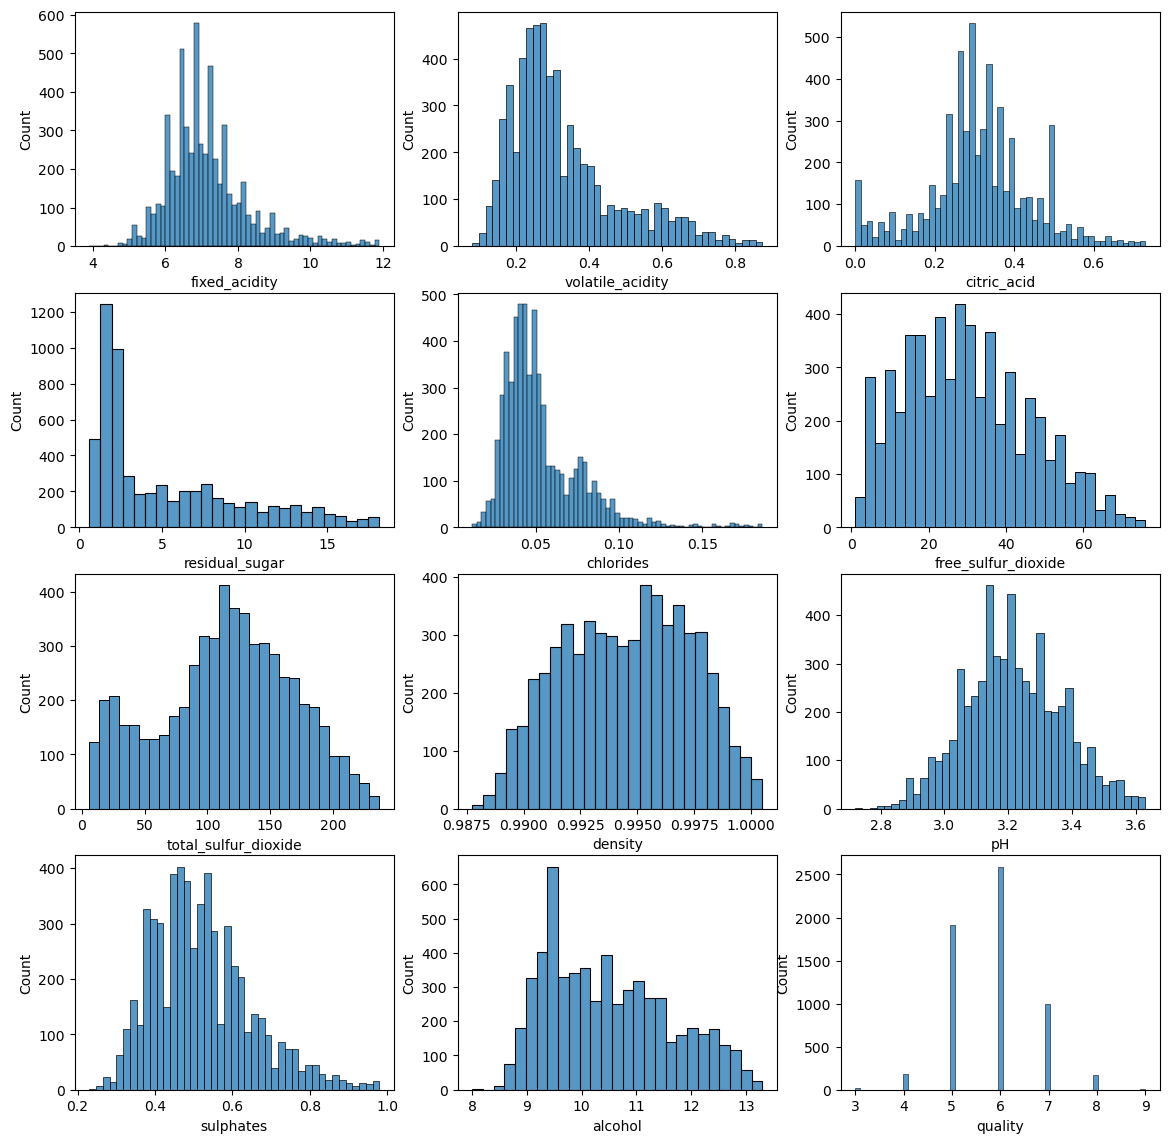

In [5]:
plt.figure(figsize=(14,14))

for i, col in enumerate(wines.drop(columns=['wine_type', 'quality_bin'])):
    plt.subplot(4,3,i+1)
    sns.histplot(wines[col])
    
plt.show()

In [6]:
train, validate, test = w.split_data(wines, 'quality_bin')

In [7]:
#Pulse check

train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_bin
2614,6.15,0.21,0.37,3.2,0.021,20.0,80.0,0.99076,3.39,0.47,12.0,5,white,bad
671,6.60,0.28,0.36,1.7,0.038,22.0,101.0,0.99120,3.29,0.57,11.6,6,white,good
4746,6.30,0.23,0.50,10.4,0.043,61.0,132.0,0.99542,2.86,0.46,9.1,6,white,good
2647,5.80,0.15,0.28,0.8,0.037,43.0,127.0,0.99198,3.24,0.51,9.3,5,white,bad
4867,5.30,0.60,0.34,1.4,0.031,3.0,60.0,0.98854,3.27,0.38,13.0,6,white,good


## Explore

### Exploring effect of selected four variables to quality

On our second iteration, we checked for correlations of all numeric variables against the continuous version of the quality target variable.

### Bivariate Exploration

$H_0$: There is no correlation between our selected features (density, pH, alcohol, sulphates) and our target variable (quality).

$H_\alpha$: There is a correlation between our selected features and our target variable (quality).

$\alpha$: 0.05

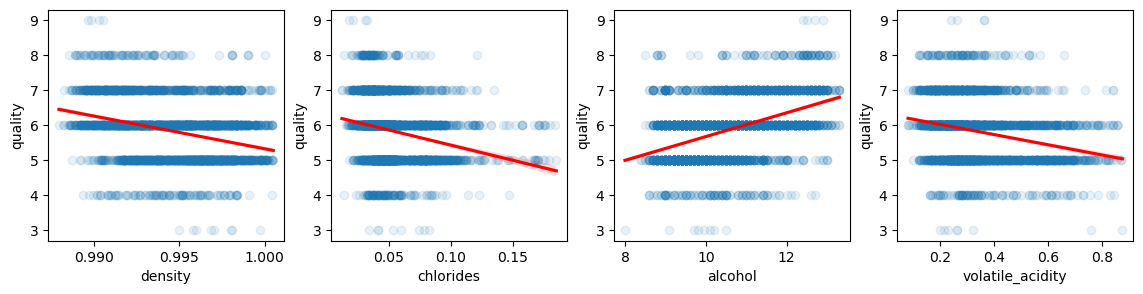

In [8]:
plt.figure(figsize=(14,3))

for i, col in enumerate(train[['density', 'chlorides', 'alcohol', 'volatile_acidity', 'quality']]):
    if col != 'quality':
        plt.subplot(1, 4, i+1)
        sns.regplot(data = train, x = col, y = 'quality', scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})

plt.show()

In [9]:
corr_df = w.correlation_tests(train[['density', 'chlorides', 'alcohol', 'volatile_acidity', 'wine_type', 'quality']])

corr_df

,feature,r,p
4,quality,1.000000,0.000000e+00
2,alcohol,0.453331,4.252438e-178
0,density,0.307832,3.490146e-78
3,volatile_acidity,0.253654,7.762193e-53
1,chlorides,0.238127,1.349135e-46


Among all twelve features, alcohol, density, volatile_acidity, and chlorides had the highest correlation with wine quality. We will keep that in mind as we move into exploring clusters (multivariate exploration).

### Multivariate Exploration

#### What clusters are useful?

We created visualizations using all combinations of the above mentioned variables against the binned target variable.

Of all visualizations, the below three stood out to us the most.

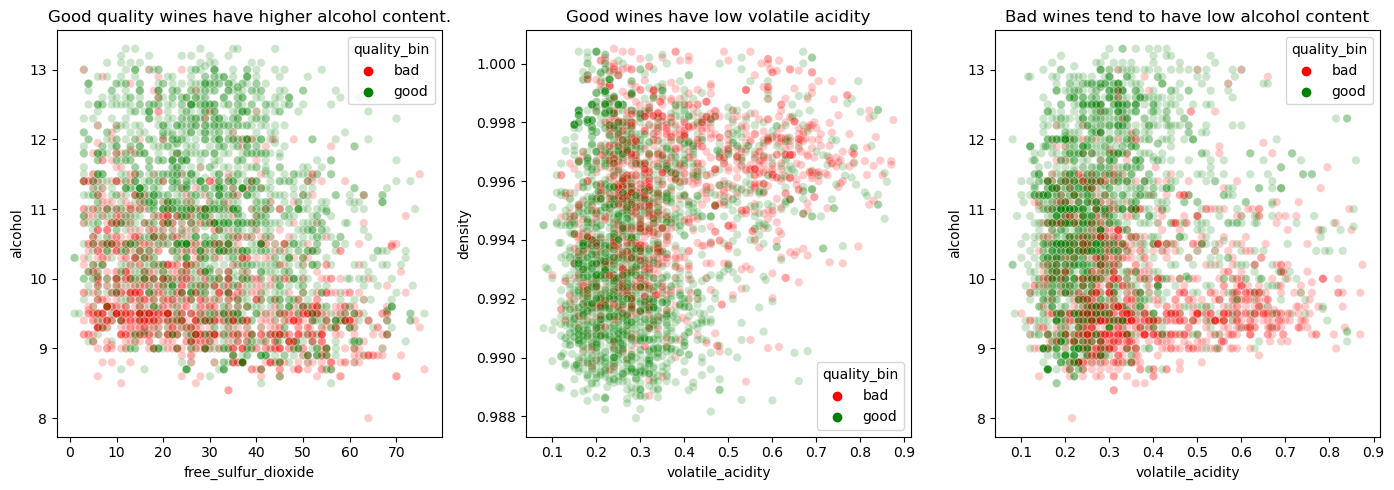

In [48]:
c_list = ['red', 'green']

plt.figure(figsize=(14,5))

plt.subplot(131)
sns.scatterplot(data=train, x='free_sulfur_dioxide', y='alcohol', hue='quality_bin', palette=c_list, alpha=0.2)
plt.title('Good quality wines have higher alcohol content.')

plt.subplot(132)
sns.scatterplot(data=train, x='volatile_acidity', y='density', hue='quality_bin', palette=c_list, alpha=0.2)
plt.title('Good wines have low volatile acidity')

plt.subplot(133)
sns.scatterplot(data=train, x='volatile_acidity', y='alcohol', hue='quality_bin', palette=c_list, alpha=0.2)
plt.title('Bad wines tend to have low alcohol content')

plt.tight_layout()
plt.show()

Created clusters for density vs. volatile acidity and alcohol vs. volatile acidity.

In [13]:
train_scaled, validate_scaled, test_scaled =  w.scale_data(train, validate, test, 
        cols=train.iloc[:, 0:11].columns)

train_scaled[['density', 'volatile_acidity', 'alcohol', 'quality_bin']].head()

,density,volatile_acidity,alcohol,quality_bin
2614,0.224522,0.163522,0.754717,bad
671,0.259554,0.251572,0.679245,good
4746,0.595541,0.188679,0.207547,good
2647,0.321656,0.088050,0.245283,bad
4867,0.047771,0.654088,0.943396,good


In [14]:
validate_scaled['quality_bin'] = pd.qcut(validate_scaled.quality, q=3, labels=['low','mid','high'])
validate_scaled['quality_bin'] = np.where(validate_scaled['quality_bin'] == 'low', 'bad', 'good')

In [15]:
test_scaled['quality_bin'] = pd.qcut(test_scaled.quality, q=3, labels=['low','mid','high'])
test_scaled['quality_bin'] = np.where(test_scaled['quality_bin'] == 'low', 'bad', 'good')

In [16]:
from sklearn.cluster import KMeans

X = train_scaled[['volatile_acidity', 'density']]

kmeans = KMeans(n_clusters=2
                , init = np.array([[0.2,0.6], [0.5,0.6]], np.float64)
                , max_iter=1
               )
kmeans.fit(X)
train_scaled['va_d'] = kmeans.predict(X)
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_bin,va_d
2614,0.28125,0.163522,0.506849,0.148148,0.052023,0.253333,0.318777,0.224522,0.736264,0.301370,0.754717,5,white,bad,0
671,0.33750,0.251572,0.493151,0.062678,0.150289,0.280000,0.410480,0.259554,0.626374,0.438356,0.679245,6,white,good,0
4746,0.30000,0.188679,0.684932,0.558405,0.179191,0.800000,0.545852,0.595541,0.153846,0.287671,0.207547,6,white,good,0
2647,0.23750,0.088050,0.383562,0.011396,0.144509,0.560000,0.524017,0.321656,0.571429,0.356164,0.245283,5,white,bad,0
4867,0.17500,0.654088,0.465753,0.045584,0.109827,0.026667,0.231441,0.047771,0.604396,0.178082,0.943396,6,white,good,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,0.33750,0.301887,0.301370,0.917379,0.196532,0.493333,0.550218,0.792994,0.549451,0.575342,0.452830,6,white,good,1
1950,0.51250,0.213836,0.178082,0.945869,0.138728,0.640000,0.925764,0.928344,0.263736,0.287671,0.320755,5,white,bad,0
4681,0.21250,0.238994,0.506849,0.017094,0.075145,0.133333,0.183406,0.040605,0.626374,0.109589,0.962264,6,white,good,0
3429,0.40000,0.125786,0.534247,0.792023,0.225434,0.626667,0.650655,0.917994,0.692308,0.726027,0.207547,5,white,bad,0


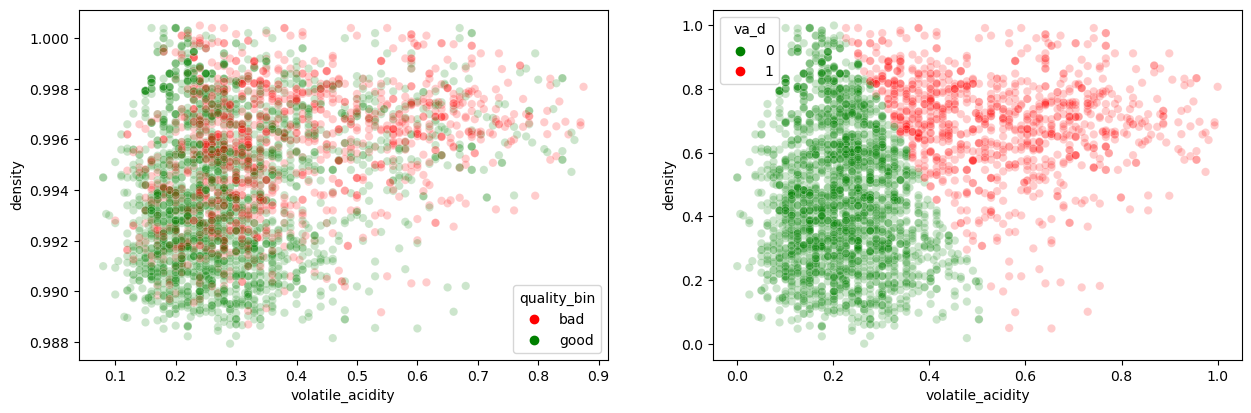

In [17]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.scatterplot(data=train, x='volatile_acidity', y='density', hue='quality_bin', palette=c_list, alpha=0.2)

plt.subplot(2,2,2)
sns.scatterplot(data=train_scaled, x='volatile_acidity', y='density', hue='va_d', palette= ['green', 'red'], alpha=0.2)

plt.show()

In [18]:
X = train_scaled[['volatile_acidity', 'alcohol']]

kmeans = KMeans(n_clusters=2
                , init = np.array([[0.05,0.45], [0.2,0.2]], np.float64)
                , max_iter=1
               )
kmeans.fit(X)
train_scaled['va_a'] = kmeans.predict(X)
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_bin,va_d,va_a
2614,0.28125,0.163522,0.506849,0.148148,0.052023,0.253333,0.318777,0.224522,0.736264,0.301370,0.754717,5,white,bad,0,0
671,0.33750,0.251572,0.493151,0.062678,0.150289,0.280000,0.410480,0.259554,0.626374,0.438356,0.679245,6,white,good,0,0
4746,0.30000,0.188679,0.684932,0.558405,0.179191,0.800000,0.545852,0.595541,0.153846,0.287671,0.207547,6,white,good,0,1
2647,0.23750,0.088050,0.383562,0.011396,0.144509,0.560000,0.524017,0.321656,0.571429,0.356164,0.245283,5,white,bad,0,1
4867,0.17500,0.654088,0.465753,0.045584,0.109827,0.026667,0.231441,0.047771,0.604396,0.178082,0.943396,6,white,good,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,0.33750,0.301887,0.301370,0.917379,0.196532,0.493333,0.550218,0.792994,0.549451,0.575342,0.452830,6,white,good,1,1
1950,0.51250,0.213836,0.178082,0.945869,0.138728,0.640000,0.925764,0.928344,0.263736,0.287671,0.320755,5,white,bad,0,1
4681,0.21250,0.238994,0.506849,0.017094,0.075145,0.133333,0.183406,0.040605,0.626374,0.109589,0.962264,6,white,good,0,0
3429,0.40000,0.125786,0.534247,0.792023,0.225434,0.626667,0.650655,0.917994,0.692308,0.726027,0.207547,5,white,bad,0,1


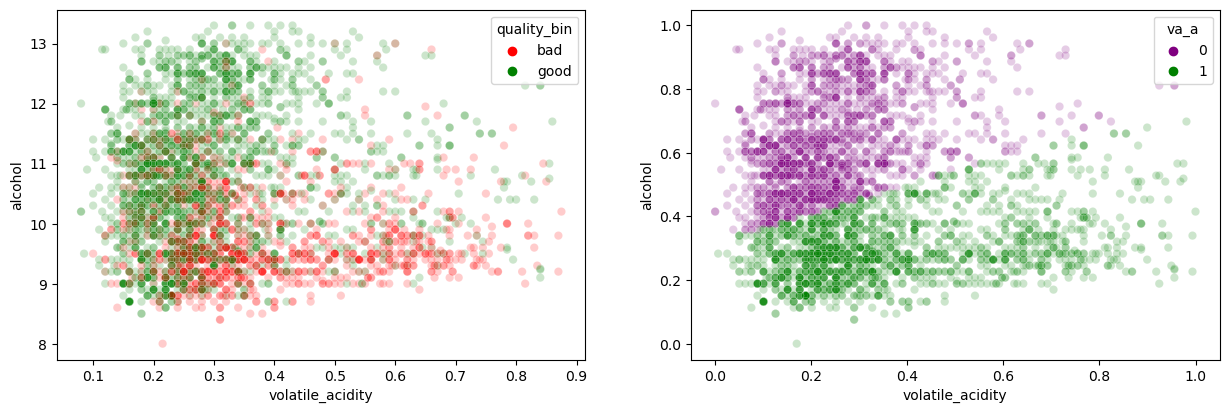

In [19]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.scatterplot(data=train, x='volatile_acidity', y='alcohol', hue='quality_bin', palette=c_list, alpha=0.2)

plt.subplot(2,2,2)
sns.scatterplot(data=train_scaled, x='volatile_acidity', y='alcohol', hue='va_a', palette= ['purple', 'green'], alpha=0.2)

plt.show()

In [20]:
from sklearn.cluster import KMeans

X = train_scaled[['free_sulfur_dioxide', 'alcohol']]

kmeans = KMeans(n_clusters=2
                , init = np.array([[0.3,0.3], [0.5,0.6]], np.float64)
                , max_iter=1
               )
kmeans.fit(X)
train_scaled['fsd_a'] = kmeans.predict(X)
train_scaled

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_bin,va_d,va_a,fsd_a
2614,0.28125,0.163522,0.506849,0.148148,0.052023,0.253333,0.318777,0.224522,0.736264,0.301370,0.754717,5,white,bad,0,0,1
671,0.33750,0.251572,0.493151,0.062678,0.150289,0.280000,0.410480,0.259554,0.626374,0.438356,0.679245,6,white,good,0,0,1
4746,0.30000,0.188679,0.684932,0.558405,0.179191,0.800000,0.545852,0.595541,0.153846,0.287671,0.207547,6,white,good,0,1,0
2647,0.23750,0.088050,0.383562,0.011396,0.144509,0.560000,0.524017,0.321656,0.571429,0.356164,0.245283,5,white,bad,0,1,0
4867,0.17500,0.654088,0.465753,0.045584,0.109827,0.026667,0.231441,0.047771,0.604396,0.178082,0.943396,6,white,good,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,0.33750,0.301887,0.301370,0.917379,0.196532,0.493333,0.550218,0.792994,0.549451,0.575342,0.452830,6,white,good,1,1,1
1950,0.51250,0.213836,0.178082,0.945869,0.138728,0.640000,0.925764,0.928344,0.263736,0.287671,0.320755,5,white,bad,0,1,0
4681,0.21250,0.238994,0.506849,0.017094,0.075145,0.133333,0.183406,0.040605,0.626374,0.109589,0.962264,6,white,good,0,0,1
3429,0.40000,0.125786,0.534247,0.792023,0.225434,0.626667,0.650655,0.917994,0.692308,0.726027,0.207547,5,white,bad,0,1,0


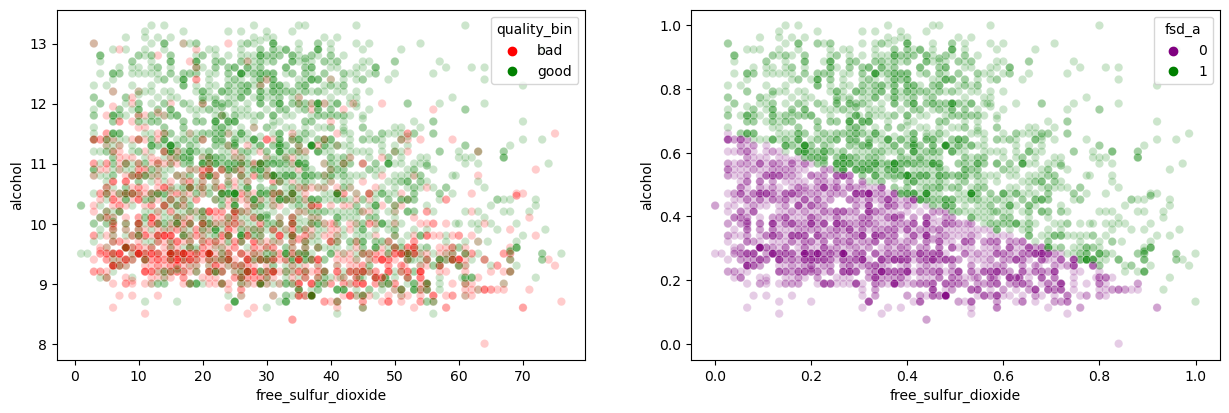

In [21]:
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
sns.scatterplot(data=train, x='free_sulfur_dioxide', y='alcohol', hue='quality_bin', palette=c_list, alpha=0.2)

plt.subplot(2,2,2)
sns.scatterplot(data=train_scaled, x='free_sulfur_dioxide', y='alcohol', hue='fsd_a', palette= ['purple', 'green'], alpha=0.2)

plt.show()

In [22]:
train_scaled.quality_bin.value_counts()

good    2255
bad     1267
Name: quality_bin, dtype: int64

In [23]:
2254/(2254+1268)

0.639977285633163

$H_0$: There is no difference in the means of the clustered sets amongst each other for quality.

$H_\alpha$: There is a difference in the means of the clusters sets amongst each other for quality.

In [24]:
l_of_l = [['va_a', 'quality_bin'], ['va_d', 'quality_bin'], ['fsd_a', 'quality_bin']]

w.chi2_test(train_scaled, l_of_l)

,feature,chi2,p,degf,expected
1,"[va_a, quality_bin]",542.508720,5.366216e-120,1,"[[619.1104486087451, 1101.889551391255], [647...."
2,"[va_d, quality_bin]",279.255290,1.091144e-62,1,"[[907.9806927881885, 1616.0193072118116], [359..."
3,"[fsd_a, quality_bin]",487.779408,4.335008e-108,1,"[[677.747870528109, 1206.252129471891], [589.2..."


Ran ANOVA tests on the three clusters towards target variable to select best clustering to send into our model.

In [25]:
# train = w.get_dummies_and_hot_encoded(train)
# validate = w.get_dummies_and_hot_encoded(validate)
# test = w.get_dummies_and_hot_encoded(test)

# means_df = w.comparison_of_means(train)

In [26]:
#means_df

The cluster with the lowest p-value was the volatile acidity and the alcohol combination. We will proceed with this cluster.

In [27]:
# plt.figure(figsize=(14,5))

# plt.subplot(131)
# sns.barplot(data=train, x='cluster_fix_vol_acid', y='quality')

# plt.subplot(132)
# sns.barplot(data=train, x='cluster_cit_acd_res_sug', y='quality')

# plt.subplot(133)
# sns.barplot(data=train, x='cluster_clorid_diox', y='quality')

# plt.show()

### Exploration Summary

* Predicting quality is easier when binned into two bins of "good" vs. "bad" wines.
* Of all physicochemical properties, alcohol, density, volatile_acidity, and chlorides were the properties with the highest correlation with quality.
* Of the 55 graphs that we looked through, the features volatile_acidity, alcohol, density, and free_sulfur_dioxide had the most visible clusters.
* Of the 3 graphs that we proceeded with, the combination of alcohol and volatile acidity had the best accuracy of good vs. bad wines.
* We will proceed with feeding the cluster of alcohol + volatile_acidity into the model, as well as the independent variables of density and chlorides.

## Modeling

### Scaling on selected features

In [28]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_bin,va_d,va_a,fsd_a
2614,0.28125,0.163522,0.506849,0.148148,0.052023,0.253333,0.318777,0.224522,0.736264,0.301370,0.754717,5,white,bad,0,0,1
671,0.33750,0.251572,0.493151,0.062678,0.150289,0.280000,0.410480,0.259554,0.626374,0.438356,0.679245,6,white,good,0,0,1
4746,0.30000,0.188679,0.684932,0.558405,0.179191,0.800000,0.545852,0.595541,0.153846,0.287671,0.207547,6,white,good,0,1,0
2647,0.23750,0.088050,0.383562,0.011396,0.144509,0.560000,0.524017,0.321656,0.571429,0.356164,0.245283,5,white,bad,0,1,0
4867,0.17500,0.654088,0.465753,0.045584,0.109827,0.026667,0.231441,0.047771,0.604396,0.178082,0.943396,6,white,good,1,0,1


In [29]:
train_scaled, validate_scaled, test_scaled = w.get_cluster_columns(train_scaled, validate_scaled, test_scaled, 
                                                                   features_list = [['volatile_acidity', 'alcohol']]
                      , clusters=2
                     , init_array = np.array([[0.05,0.45], [0.2,0.2]], np.float64)
                     , iterations = 1)

In [30]:
train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type,quality_bin,va_d,va_a,fsd_a,volatile_acidity_alcohol
2614,0.28125,0.163522,0.506849,0.148148,0.052023,0.253333,0.318777,0.224522,0.736264,0.301370,0.754717,5,white,bad,0,0,1,0
671,0.33750,0.251572,0.493151,0.062678,0.150289,0.280000,0.410480,0.259554,0.626374,0.438356,0.679245,6,white,good,0,0,1,0
4746,0.30000,0.188679,0.684932,0.558405,0.179191,0.800000,0.545852,0.595541,0.153846,0.287671,0.207547,6,white,good,0,1,0,1
2647,0.23750,0.088050,0.383562,0.011396,0.144509,0.560000,0.524017,0.321656,0.571429,0.356164,0.245283,5,white,bad,0,1,0,1
4867,0.17500,0.654088,0.465753,0.045584,0.109827,0.026667,0.231441,0.047771,0.604396,0.178082,0.943396,6,white,good,1,0,1,0


In [31]:
features = ['volatile_acidity_alcohol', 'chlorides', 'density']

X_train = train_scaled[features]
y_train = train_scaled.quality_bin

X_validate = validate_scaled[features]
y_validate = validate_scaled.quality_bin

X_test = test_scaled[features]
y_test = test_scaled.quality_bin

In [32]:
w.create_knn(X_train,y_train, X_validate, y_validate)

,model_train,train_predict,validate_predict,n_neighbors
0,knn,0.639977,0.639977,neighbors
1,KNeighborsClassifier,0.974446,0.707836,1
2,KNeighborsClassifier,0.860591,0.648211,2
3,KNeighborsClassifier,0.841567,0.689097,3
4,KNeighborsClassifier,0.789608,0.678876,4
5,KNeighborsClassifier,0.792731,0.687394,5
6,KNeighborsClassifier,0.773708,0.690801,6
7,KNeighborsClassifier,0.766610,0.699319,7
8,KNeighborsClassifier,0.756388,0.701022,8
9,KNeighborsClassifier,0.745315,0.689097,9


In [33]:
w.create_logistic_regression(X_train,y_train, X_validate, y_validate)

,model_train,train_predict,validate_predict,C
0,LogisticRegression,0.639977,0.639977,the_c
1,LogisticRegression,0.658433,0.656729,0.01
2,LogisticRegression,0.685406,0.695911,0.1
3,LogisticRegression,0.686258,0.706133,1
4,LogisticRegression,0.686826,0.706133,10
5,LogisticRegression,0.687110,0.706133,100
6,LogisticRegression,0.688813,0.706985,1000


In [34]:
df, test_df = w.create_random_forest(X_train,y_train, X_validate, y_validate, X_test, y_test)

df

,model_train,train_predict,validate_predict,max_depth
0,RandomForestClassifier,0.639977,0.639977,max_depth
1,RandomForestClassifier,0.640261,0.640545,1
2,RandomForestClassifier,0.691369,0.692504,2
3,RandomForestClassifier,0.713799,0.701022,3
4,RandomForestClassifier,0.721465,0.706133,4
5,RandomForestClassifier,0.736513,0.701874,5
6,RandomForestClassifier,0.748722,0.707836,6
7,RandomForestClassifier,0.764622,0.709540,7
8,RandomForestClassifier,0.791880,0.716354,8
9,RandomForestClassifier,0.823964,0.713799,9


In [35]:
w.create_descision_tree(X_train,y_train, X_validate, y_validate)

,model_train,train_predict,validate_predict,max_depth
0,DecisionTreeClassifier,0.639977,0.639977,max_depth
1,DecisionTreeClassifier,0.685406,0.696763,1
2,DecisionTreeClassifier,0.689949,0.678876,2
3,DecisionTreeClassifier,0.706985,0.700170,3
4,DecisionTreeClassifier,0.710108,0.687394,4
5,DecisionTreeClassifier,0.716354,0.683986,5
6,DecisionTreeClassifier,0.729699,0.689949,6
7,DecisionTreeClassifier,0.747871,0.696763,7
8,DecisionTreeClassifier,0.760931,0.706133,8
9,DecisionTreeClassifier,0.782226,0.699319,9


In [36]:
w.super_classification_model(X_train,y_train, X_validate, y_validate, the_c = 1)

,model_train,train_predict,validate_predict
0,baseline,0.639977,0.639977
1,KNeighborsClassifier,0.726292,0.695911
2,LogisticRegression,0.686258,0.706133
3,RandomForestClassifier,0.736513,0.701874
4,DecisionTreeClassifier,0.729699,0.689949


In [37]:
df

,model_train,train_predict,validate_predict,max_depth
0,RandomForestClassifier,0.639977,0.639977,max_depth
1,RandomForestClassifier,0.640261,0.640545,1
2,RandomForestClassifier,0.691369,0.692504,2
3,RandomForestClassifier,0.713799,0.701022,3
4,RandomForestClassifier,0.721465,0.706133,4
5,RandomForestClassifier,0.736513,0.701874,5
6,RandomForestClassifier,0.748722,0.707836,6
7,RandomForestClassifier,0.764622,0.709540,7
8,RandomForestClassifier,0.791880,0.716354,8
9,RandomForestClassifier,0.823964,0.713799,9


In [38]:
test_df

,model_train,baseline,max_depth
0,RandomForestClassifier,0.639977,max_depth
1,RandomForestClassifier,0.698723,5


In [39]:
#train_scaled, validate_scaled, test_scaled =  w.scale_data(train, validate, test)

In [40]:
#train_scaled.head()

In [41]:
#X_train, X_validate, X_test, y_train, y_validate, y_test = w.mvp_info(train_scaled, validate_scaled, test_scaled)

In [42]:
#X_train.head()

In [43]:
#metrics_train_df, metrics_validate_df, metrics_test_df= w.get_model_numbers(X_train, X_validate, X_test, y_train, y_validate, y_test)

In [44]:
#metrics_train_df

In [45]:
#metrics_validate_df

In [46]:
#metrics_test_df

### Modeling Summary

* Random Forest performed the best

## Conclusion

* Since the top model only performend with an R2 score of 0.22, we cannot move forward with it.
* Solution would be to continue onto next steps in hopes of creating a better model.

# Next Steps

* Look over different sets of clusters among the wine data by going over iterations of the data.
* Find other independent variables that affect the target variable.